# Financial Data and Preprocessing 

In [1]:
# Importing necessary libraries for data manipulation, financial data retrieval, analysis, and visualization

import pandas as pd
import yfinance as yf
import quandl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# Enabling inline plotting for Jupyter notebooks
%matplotlib inline
# Improving the resolution of inline plots
%config InlineBackend.figure_format = 'retina'

# Initialize cufflinks for offline plotting
cf.go_offline()
init_notebook_mode(connected=True)

In [2]:
# Fetch historical stock data for Apple Inc. (AAPL) from Yahoo Finance
df_yahoo = yf.download(
    'AAPL', 
    start='2000-01-01',
    end='2010-12-31',
    progress=False
)

# Display the first few rows of the downloaded data
print(df_yahoo.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400


In [3]:
# Inspect the data:

print(f'Downloaded {df_yahoo.shape[0]} rows of data.')

df_yahoo.head()

Downloaded 2766 rows of data.


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.844981  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.773741  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.785063  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.717125  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.751094  460734400

In [4]:
# Getting data from Quandl 
# Authenticate using the personal API key:

#QUANDL_KEY = '{key}' # replace {key} with your own API key
QUANDL_KEY = '15L4ky9aN_bF_6uss8CA'
quandl.ApiConfig.api_key = QUANDL_KEY

In [5]:
# Download the data:

df_quandl = quandl.get(dataset='WIKI/AAPL',
                      start_date='2000-01-01', 
                      end_date='2010-12-31')

In [6]:
# Inspect the data:

print(f'Downloaded {df_quandl.shape[0]} rows of data.')

df_quandl.head()

Downloaded 2767 rows of data.


Open    High     Low   Close     Volume  Ex-Dividend  \
Date                                                                 
2000-01-03  104.87  112.50  101.69  111.94  4783900.0          0.0   
2000-01-04  108.25  110.62  101.19  102.50  4574800.0          0.0   
2000-01-05  103.75  110.56  103.00  104.00  6949300.0          0.0   
2000-01-06  106.12  107.00   95.00   95.00  6856900.0          0.0   
2000-01-07   96.50  101.00   95.50   99.50  4113700.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2000-01-03          1.0   3.369314   3.614454  3.267146    3.596463   
2000-01-04          1.0   3.477908   3.554053  3.251081    3.293170   
2000-01-05          1.0   3.333330   3.552125  3.309234    3.341362   
2000-01-06          1.0   3.409475   3.437748  3.052206    3.052206   
2000-01-07          1.0   3.100399   3.244977  3.068270    3.196784   

            Adj. Volume  
Date                     
2000-01-03  133949200.0  
2000-01-04  128094400.0  
2000-01-05  194580400.0  
2000-01-06  191993200.0  
2000-01-07  115183600.0

In [7]:
# Converting prices to returns
# Download the data and keep the adjusted close prices only:

# Fetch historical stock data for Apple Inc. (AAPL) from Yahoo Finance
df = yf.download(
    'AAPL',     
    start='2000-01-01',
    end='2010-12-31', 
    progress=False 
)

# Keep only the adjusted close prices
df = df.loc[:, ['Adj Close']]

# Rename the column for better readability
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# Display the first few rows of the modified DataFrame
print(df.head())

            adj_close
Date                 
2000-01-03   0.844981
2000-01-04   0.773741
2000-01-05   0.785063
2000-01-06   0.717125
2000-01-07   0.751094


In [8]:
# Convert adjusted close prices to simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# Display the first few rows of the DataFrame with returns
print("\nDataFrame with Returns:")
df.head()


DataFrame with Returns:


adj_close  simple_rtn   log_rtn
Date                                       
2000-01-03   0.844981         NaN       NaN
2000-01-04   0.773741   -0.084310 -0.088077
2000-01-05   0.785063    0.014633  0.014527
2000-01-06   0.717125   -0.086538 -0.090514
2000-01-07   0.751094    0.047369  0.046281

In [9]:
# There's more

QUANDL_KEY = 'zdnXhQuEaGjoTtwytDk-'
quandl.ApiConfig.api_key = QUANDL_KEY

In [10]:
# Create a DataFrame with all dates in the range
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31', end='2010-12-31'))

# Join the all-dates DataFrame with the adjusted close prices DataFrame
df = df_all_dates.join(df[['adj_close']], how='left')

# Forward fill missing values and resample to monthly frequency
df = df.fillna(method='ffill').asfreq('M')

In [11]:
# Download inflation data from Quandl:

df_cpi = quandl.get(dataset='FRED/CPIAUCSL', 
                   start_date='1999-12-01', 
                   end_date='2010-12-31')
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

In [12]:
# Merge inflation data to prices:

df_merged = df.join(df_cpi, how='left')

In [13]:
# Calculate simple returns and inflation rate:

df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

In [14]:
# Adjust returns for inflation:

df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

adj_close  cpi  simple_rtn  inflation_rate  real_rtn
1999-12-31        NaN  NaN         NaN             NaN       NaN
2000-01-31   0.783176  NaN         NaN             NaN       NaN
2000-02-29   0.865269  NaN    0.104820             NaN       NaN
2000-03-31   1.025206  NaN    0.184841             NaN       NaN
2000-04-30   0.936509  NaN   -0.086516             NaN       NaN

In [15]:
# Changing frequency
# Obtain the simple returns in case of starting in this recipe:

# download data 
df = yf.download('AAPL', 
                start='2000-01-01', 
                end='2010-12-31', 
                auto_adjust=False,
                progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)

df.head()

log_rtn
Date                
2000-01-04 -0.088077
2000-01-05  0.014527
2000-01-06 -0.090514
2000-01-07  0.046281
2000-01-10 -0.017744

In [16]:
# Define the function for calculating the realized volatility:

def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [17]:
# Calculate monthly realized volatility:

df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

In [18]:
# Annualize the values:

df_rv.rv = df_rv.rv * np.sqrt(12)

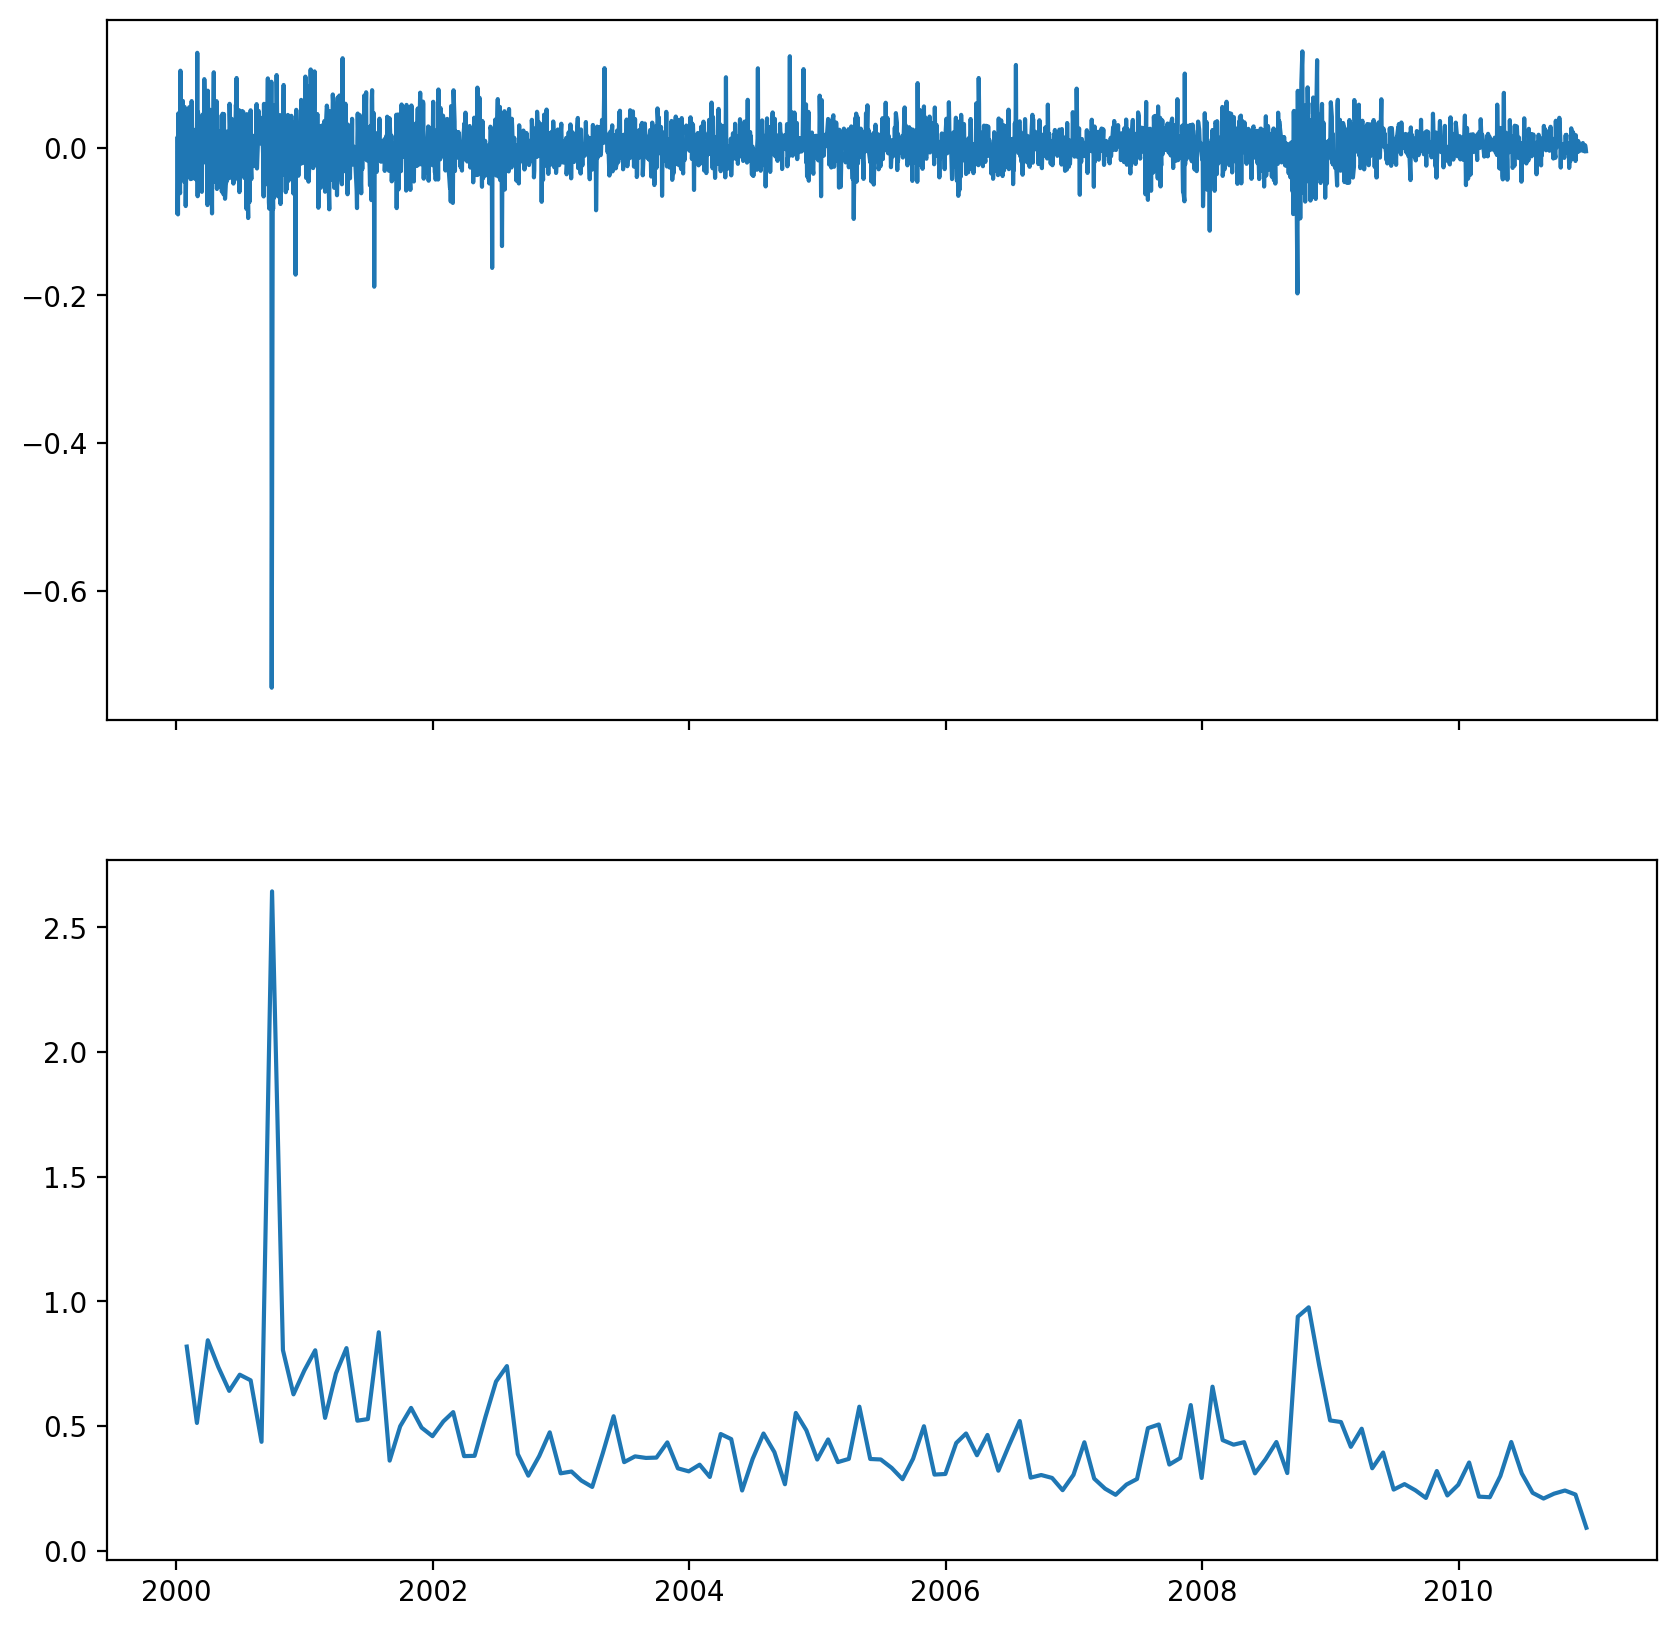

In [19]:
# Plot the results:

fig, ax = plt.subplots(2, 1, sharex=True,figsize=(10,10))
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()

In [20]:
# Visualizing time series data

# download data as pandas DataFrame
df = yf.download('MSFT', auto_adjust = False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# create simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# dropping NA's in the first row
df.dropna(how = 'any', inplace = True)

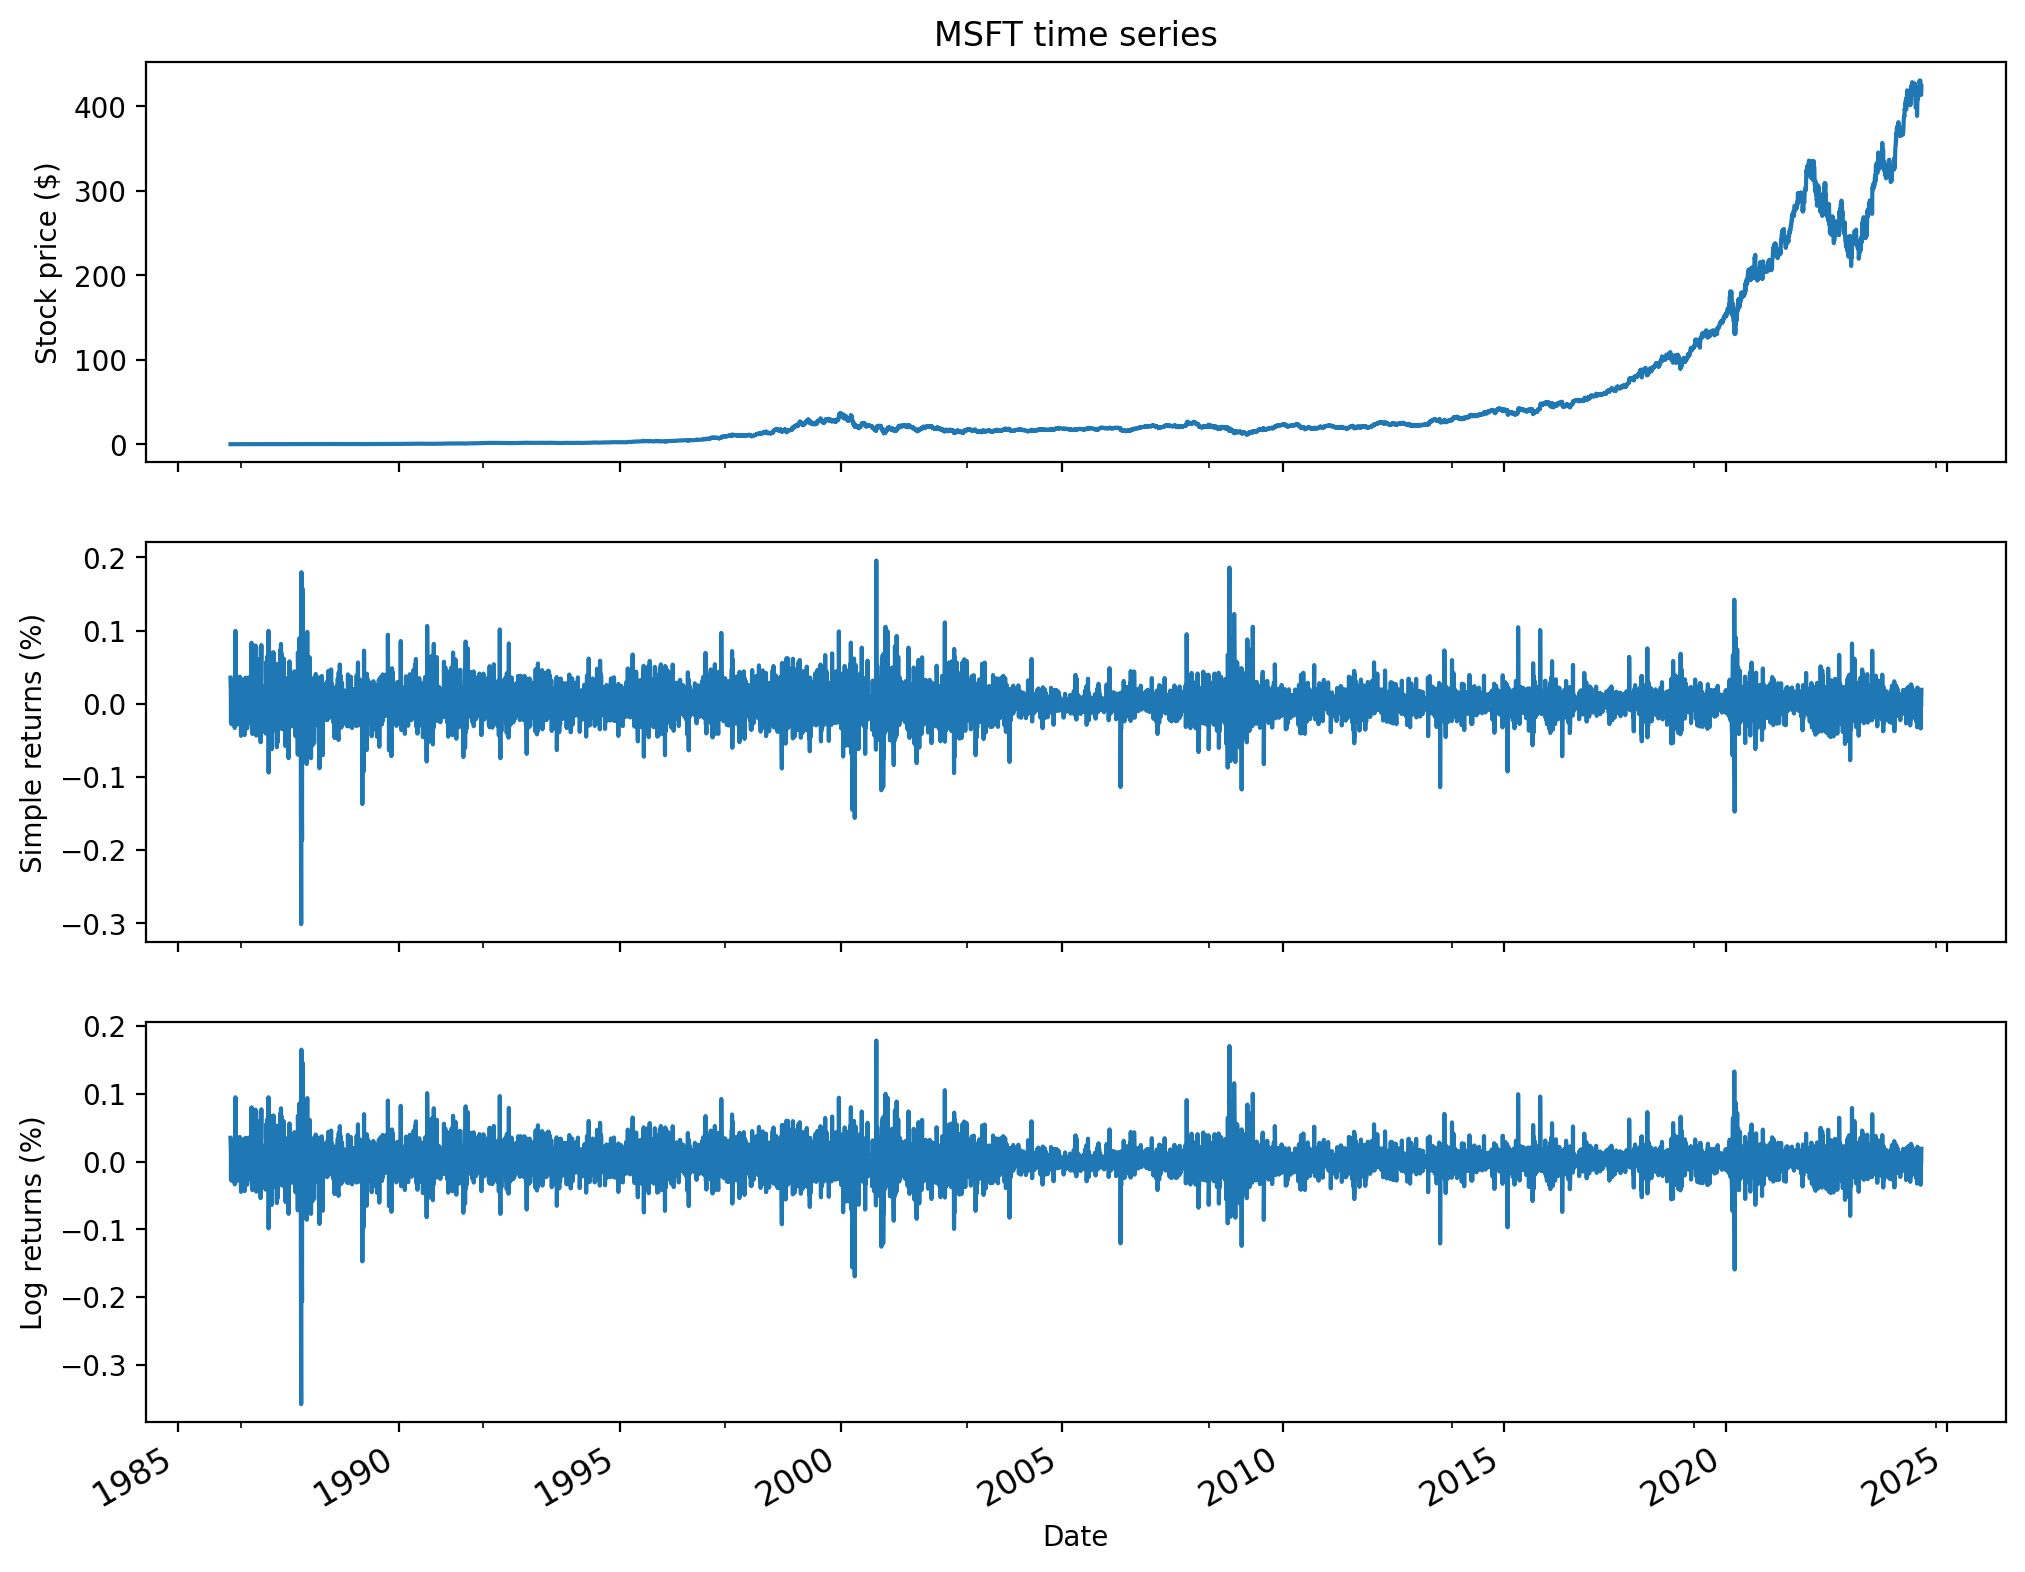

In [21]:
# the plot method of pandas

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# add prices
df.adj_close.plot(ax=ax[0])
ax[0].set(title = 'MSFT time series',
         ylabel = 'Stock price ($)')

# add simple returns 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel = 'Simple returns (%)')

# add log returns 
df.log_rtn.plot(ax=ax[2])
ax[2].set(xlabel = 'Date', 
         ylabel = 'Log returns (%)')

ax[2].tick_params(axis='x',
                 which='major',
                 labelsize=12)

# plt.tight_layout()
plt.show()

#### `plotly` + `cufflinks`

1. Import the libraries and handle the settings:

In [22]:


# set up settings (run it once)
# cf.set_config_file(world_readable=True, theme='pearl',  offline=True)

# initialize notebook display
init_notebook_mode()

In [23]:
# Create the plots:

cf.set_config_file(world_readable=True, theme='pearl',offline=True)
df.iplot(subplots=True, shape=(3,1), shared_xaxes=True, title='MSFT time series')

In [24]:
# Identifying outliers

df = yf.download('AAPL', 
                start='2000-01-01', 
                end='2010-12-31',
                progress=False)

df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [25]:
df['simple_rtn'] = df.adj_close.pct_change()

In [26]:
df.head()

adj_close  simple_rtn
Date                             
2000-01-03   0.844981         NaN
2000-01-04   0.773741   -0.084310
2000-01-05   0.785063    0.014633
2000-01-06   0.717125   -0.086538
2000-01-07   0.751094    0.047369

In [27]:
df_rolling = df[['simple_rtn']].rolling(window=21) \
                               .agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

In [28]:
df_outliers = df.join(df_rolling)

In [29]:
def identify_outliers(row, n_sigmas=3):
    """
    Function for identifying outliers using the 3 sigma rule.
    The row must contain the following columns/indices: simple_rtn, mean, std.

    Parameters
    ----------
    row : pd.Series
        A row of a pd.DataFrame, over which the function can be applied.
    n_sigmas : int
        The number of standard deviations above/below the mean - used for detecting outliers.

    Returns
    -------
    int
        An integer with 1 indicating an outlier and 0 otherwise.
    """
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    # Check if the simple return is outside the specified number of standard deviations from the mean
    if (x > mu + n_sigmas * sigma) or (x < mu - n_sigmas * sigma):
        return 1  # Outlier
    else:
        return 0  # Not an outlier

In [30]:
# Identify the outliers and extract their values for later use:

df_outliers['outlier'] = df_outliers.apply(identify_outliers, axis=1)

outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]

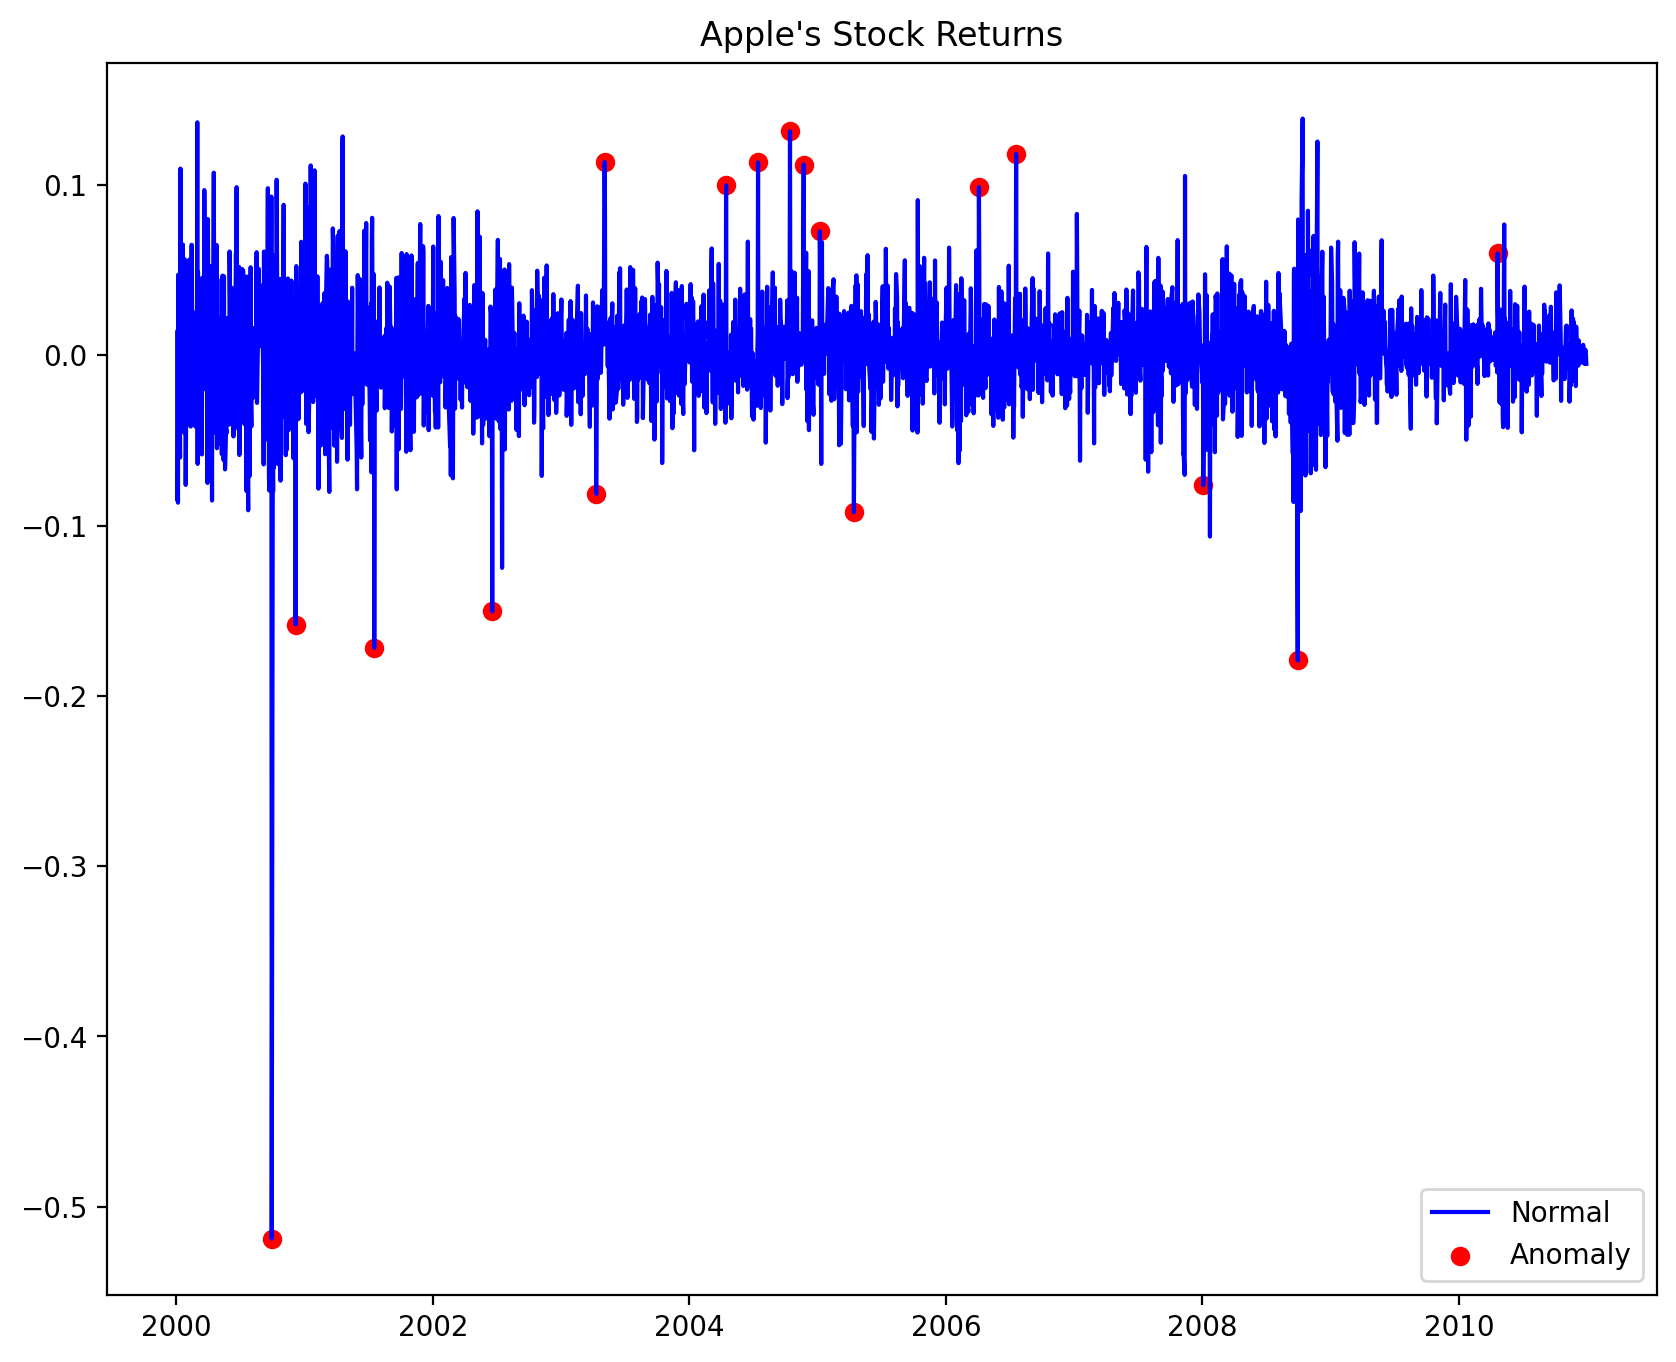

In [31]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title("Apple's Stock Returns")
ax.legend(loc='lower right')
plt.show()

## Investigating stylized facts of asset returns

In [32]:
# Download the S&P 500 data and calculate the returns:

# Download the S&P 500 data from Yahoo Finance
df = yf.download('^GSPC', 
                 start='1985-01-01', 
                 end='2018-12-31', 
                 progress=False)

# Keep only the 'Adj Close' column and rename it to 'adj_close'
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})

# Calculate the log returns
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))

# Keep only the 'adj_close' and 'log_rtn' columns, dropping any rows with NaN values
df = df[['adj_close', 'log_rtn']].dropna()

# Display the first few rows of the DataFrame to verify
df.head()

adj_close   log_rtn
Date                            
1985-01-03  164.570007 -0.004849
1985-01-04  163.679993 -0.005423
1985-01-07  164.240005  0.003416
1985-01-08  163.990005 -0.001523
1985-01-09  165.179993  0.007230

#### Fact 1 - Non-Gaussian distribution of returns

In [33]:
# Calculate the Normal PDF using the mean and standard deviation of the observed returns:

r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

C:\Users\USER\AppData\Local\Temp\ipykernel_26028\1556027034.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




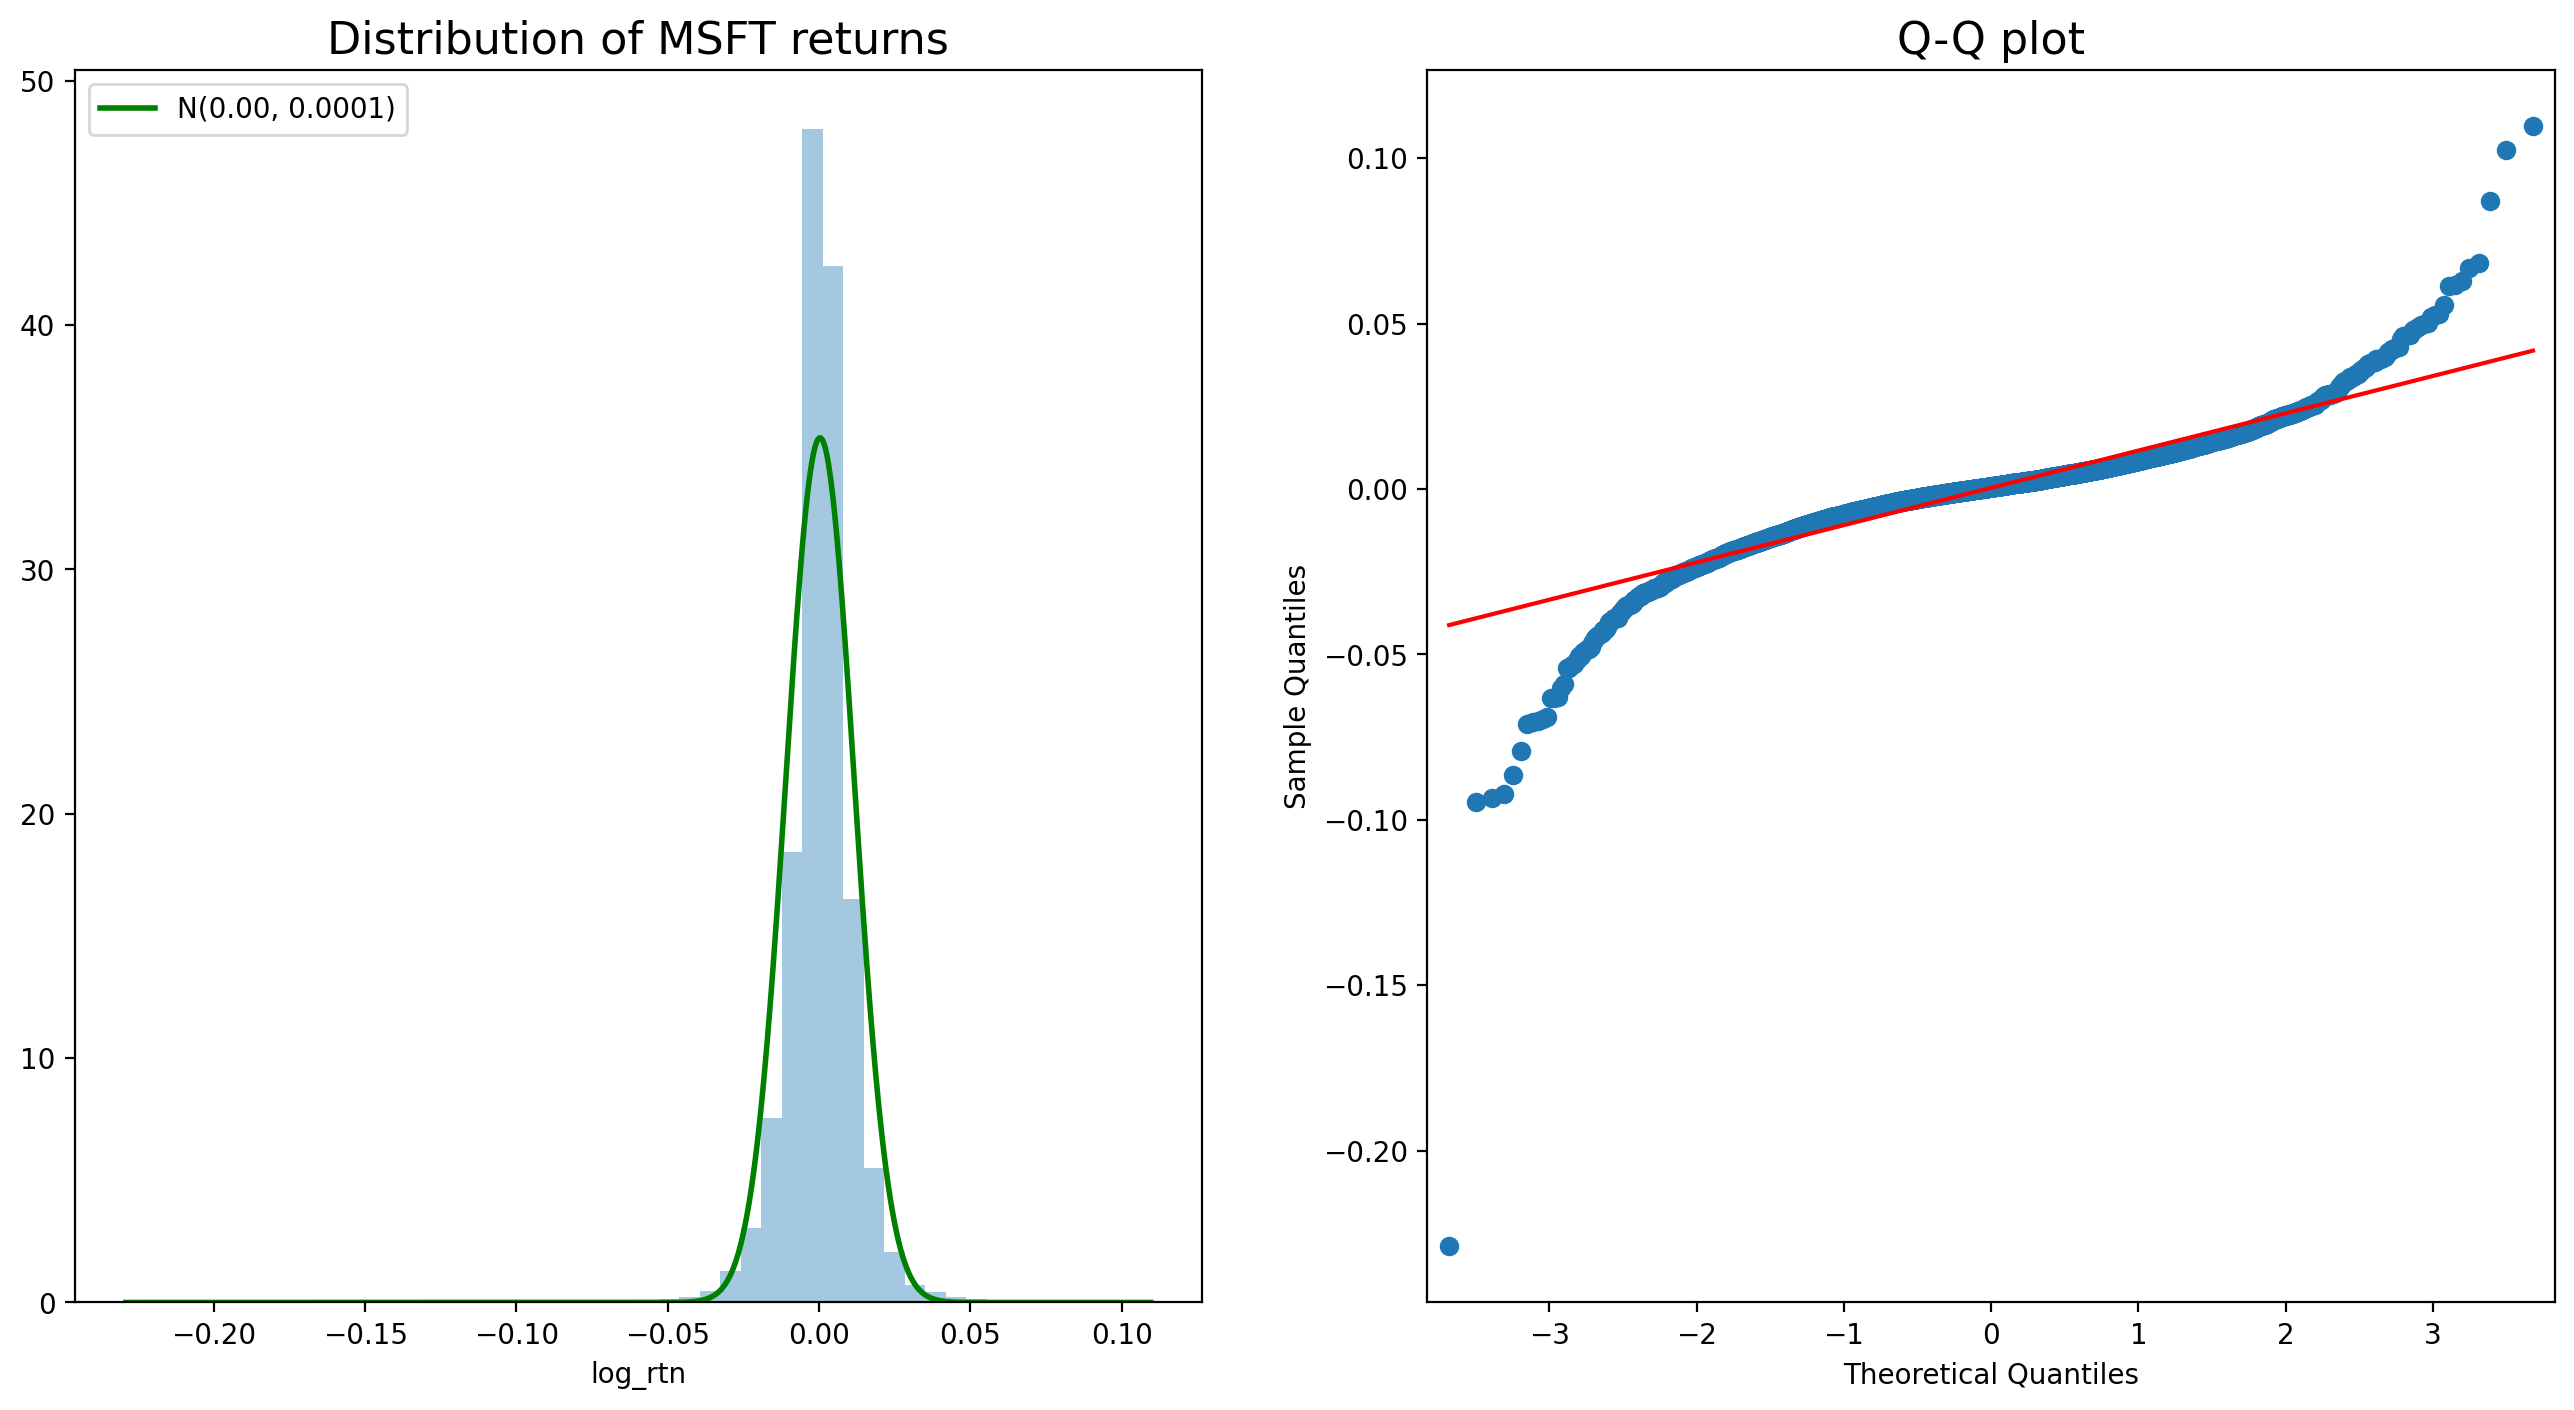

In [34]:
# Plot the histogram and the Q-Q Plot:

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0])                                    
ax[0].set_title('Distribution of MSFT returns', fontsize=16)                                                    
ax[0].plot(r_range, norm_pdf, 'g', lw=2,
          label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)

# plt.tight_layout()
plt.show()

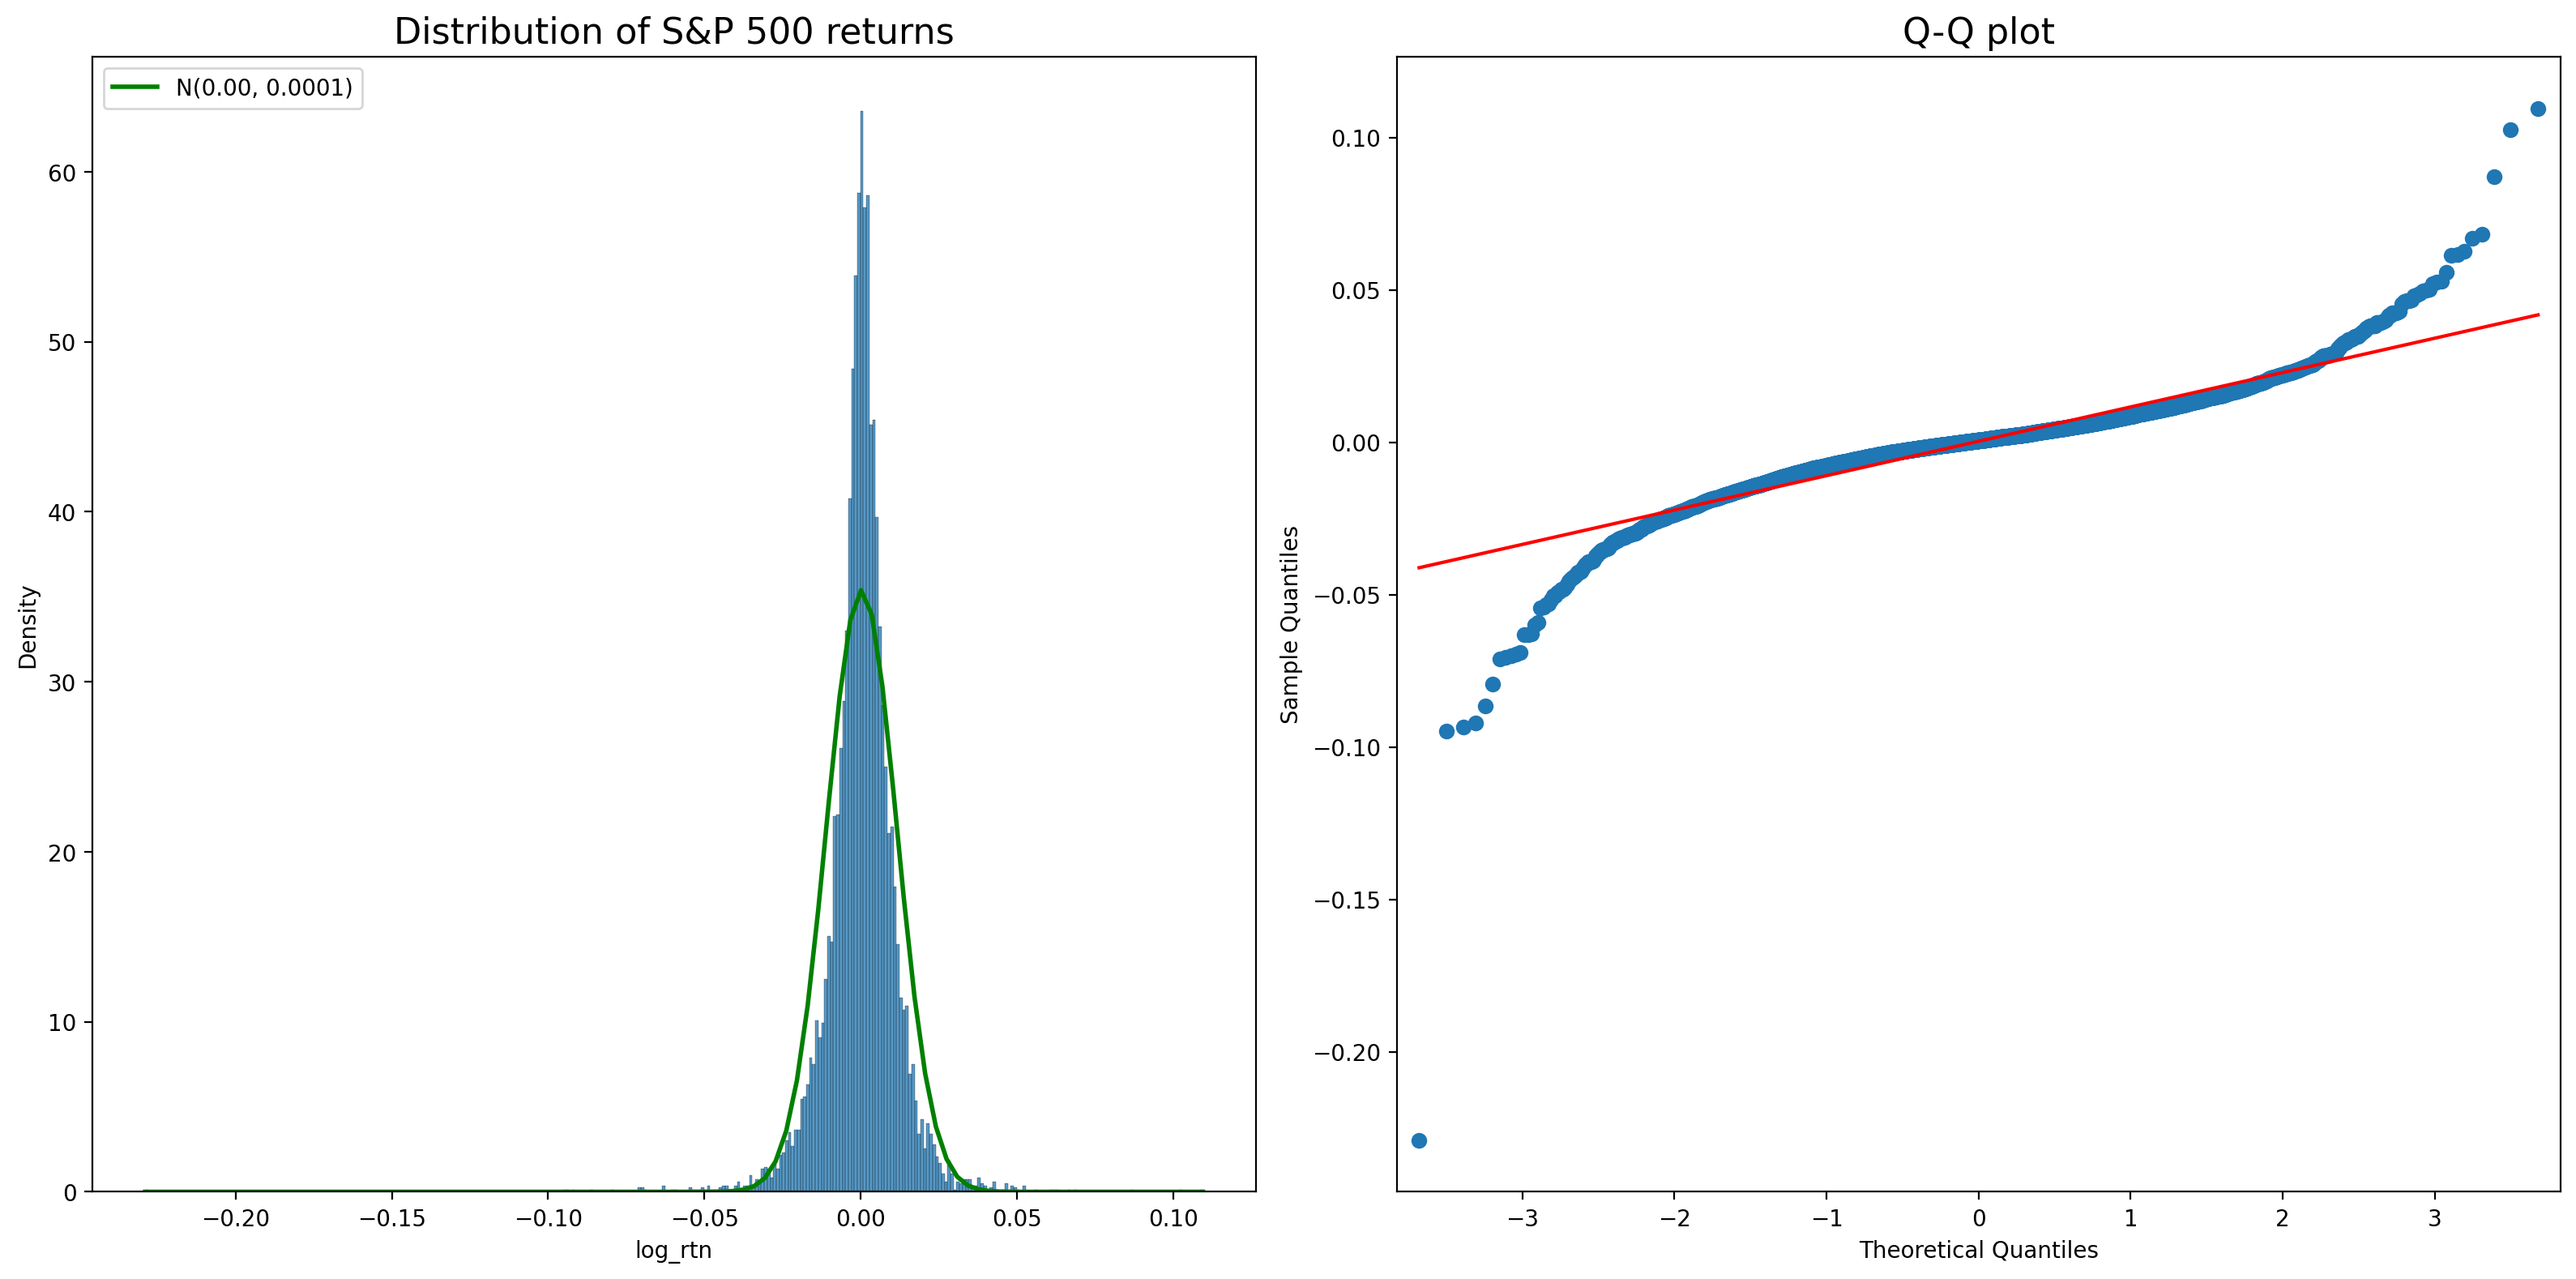

In [35]:
# Plot the histogram and the Q-Q plot
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Histogram of log returns
sns.histplot(df.log_rtn, kde=False, stat='density', ax=ax[0])                                    
ax[0].set_title('Distribution of S&P 500 returns', fontsize=16)

# Calculate the normal distribution parameters
mu, sigma = df.log_rtn.mean(), df.log_rtn.std()
r_range = np.linspace(df.log_rtn.min(), df.log_rtn.max(), num=100)
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

# Plot the normal distribution curve
ax[0].plot(r_range, norm_pdf, 'g', lw=2, label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left')

# Q-Q plot
sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)

# Show plots
plt.tight_layout()
plt.show()

In [36]:
# Calculate Jarque-Bera test
jb_test = scs.jarque_bera(df.log_rtn.values)

# Print summary statistics
print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))
print('Number of observations:', df.shape[0])
print(f'Mean: {df.log_rtn.mean():.4f}')
print(f'Median: {df.log_rtn.median():.4f}')
print(f'Min: {df.log_rtn.min():.4f}')
print(f'Max: {df.log_rtn.max():.4f}')
print(f'Standard Deviation: {df.log_rtn.std():.4f}')
print(f'Skewness: {df.log_rtn.skew():.4f}')
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera statistic: 282134.38 with p-value: 0.00


#### Fact 2 - Volatility Clustering

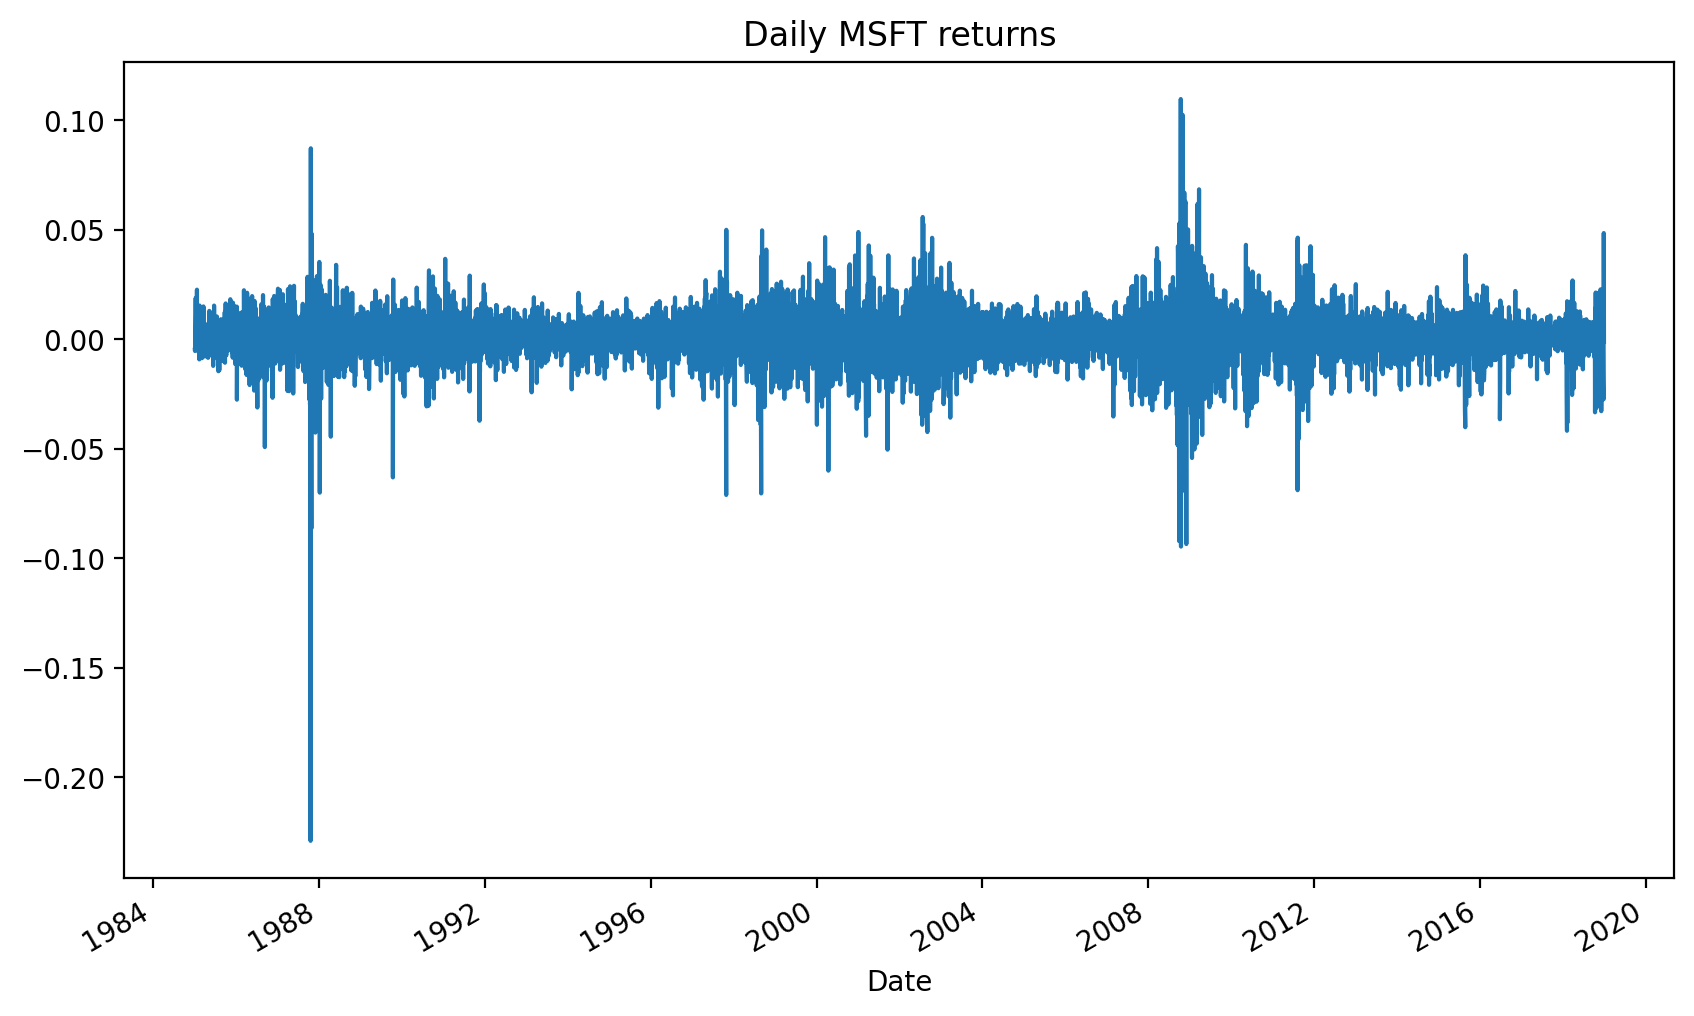

In [37]:
# Run the following code to visualize the log returns series:

df.log_rtn.plot(title='Daily MSFT returns', figsize=(10, 6))

# plt.tight_layout()
plt.show()

#### Fact 3 - Absence of autocorrelation in returns

1. Define the parameters for creating the Autocorrelation plots:

In [38]:
N_LAGS = 50
SIGNIFICANCE_LEVEL = 0.05

2. Run the following code to create ACF plot of log returns:

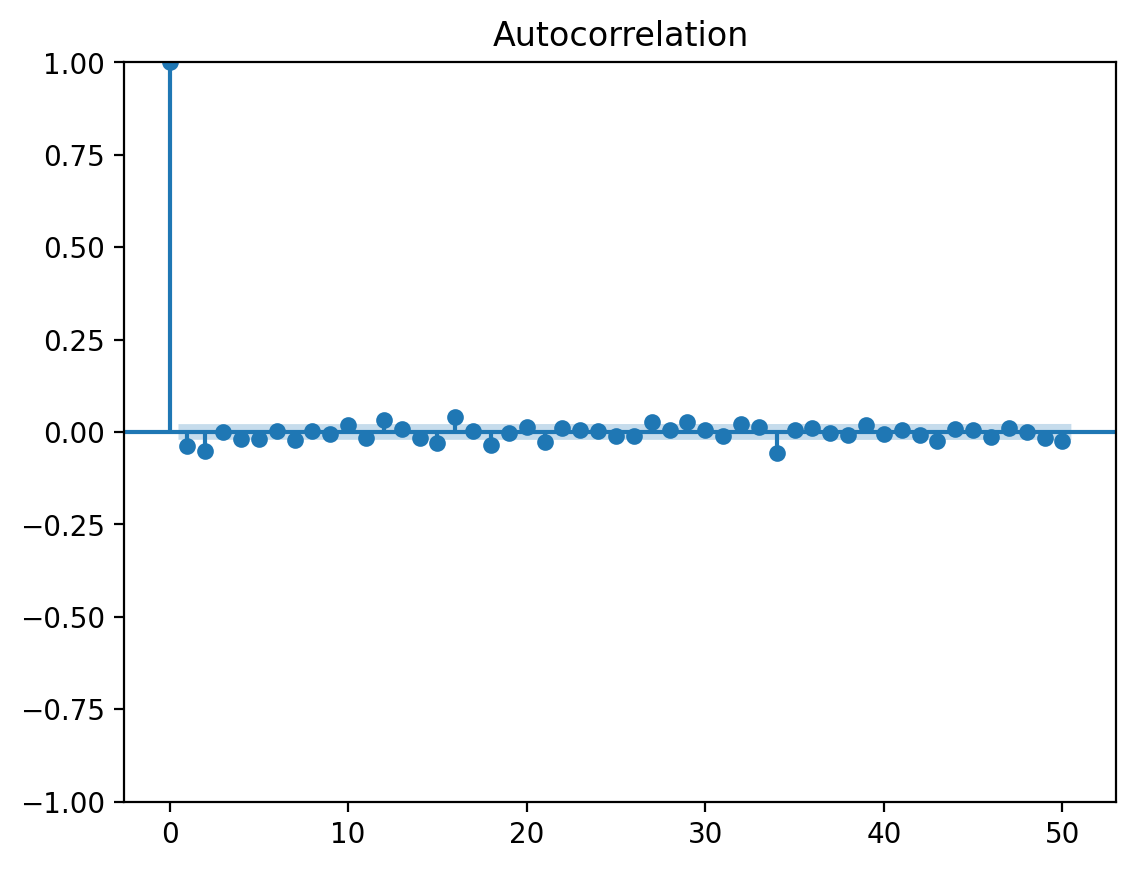

In [39]:
acf = smt.graphics.plot_acf(df.log_rtn, 
                            lags=N_LAGS, 
                            alpha=SIGNIFICANCE_LEVEL)

#plt.tight_layout()
plt.show()

#### Fact 4 - Small and decreasing autocorrelation in squared/absolute returns

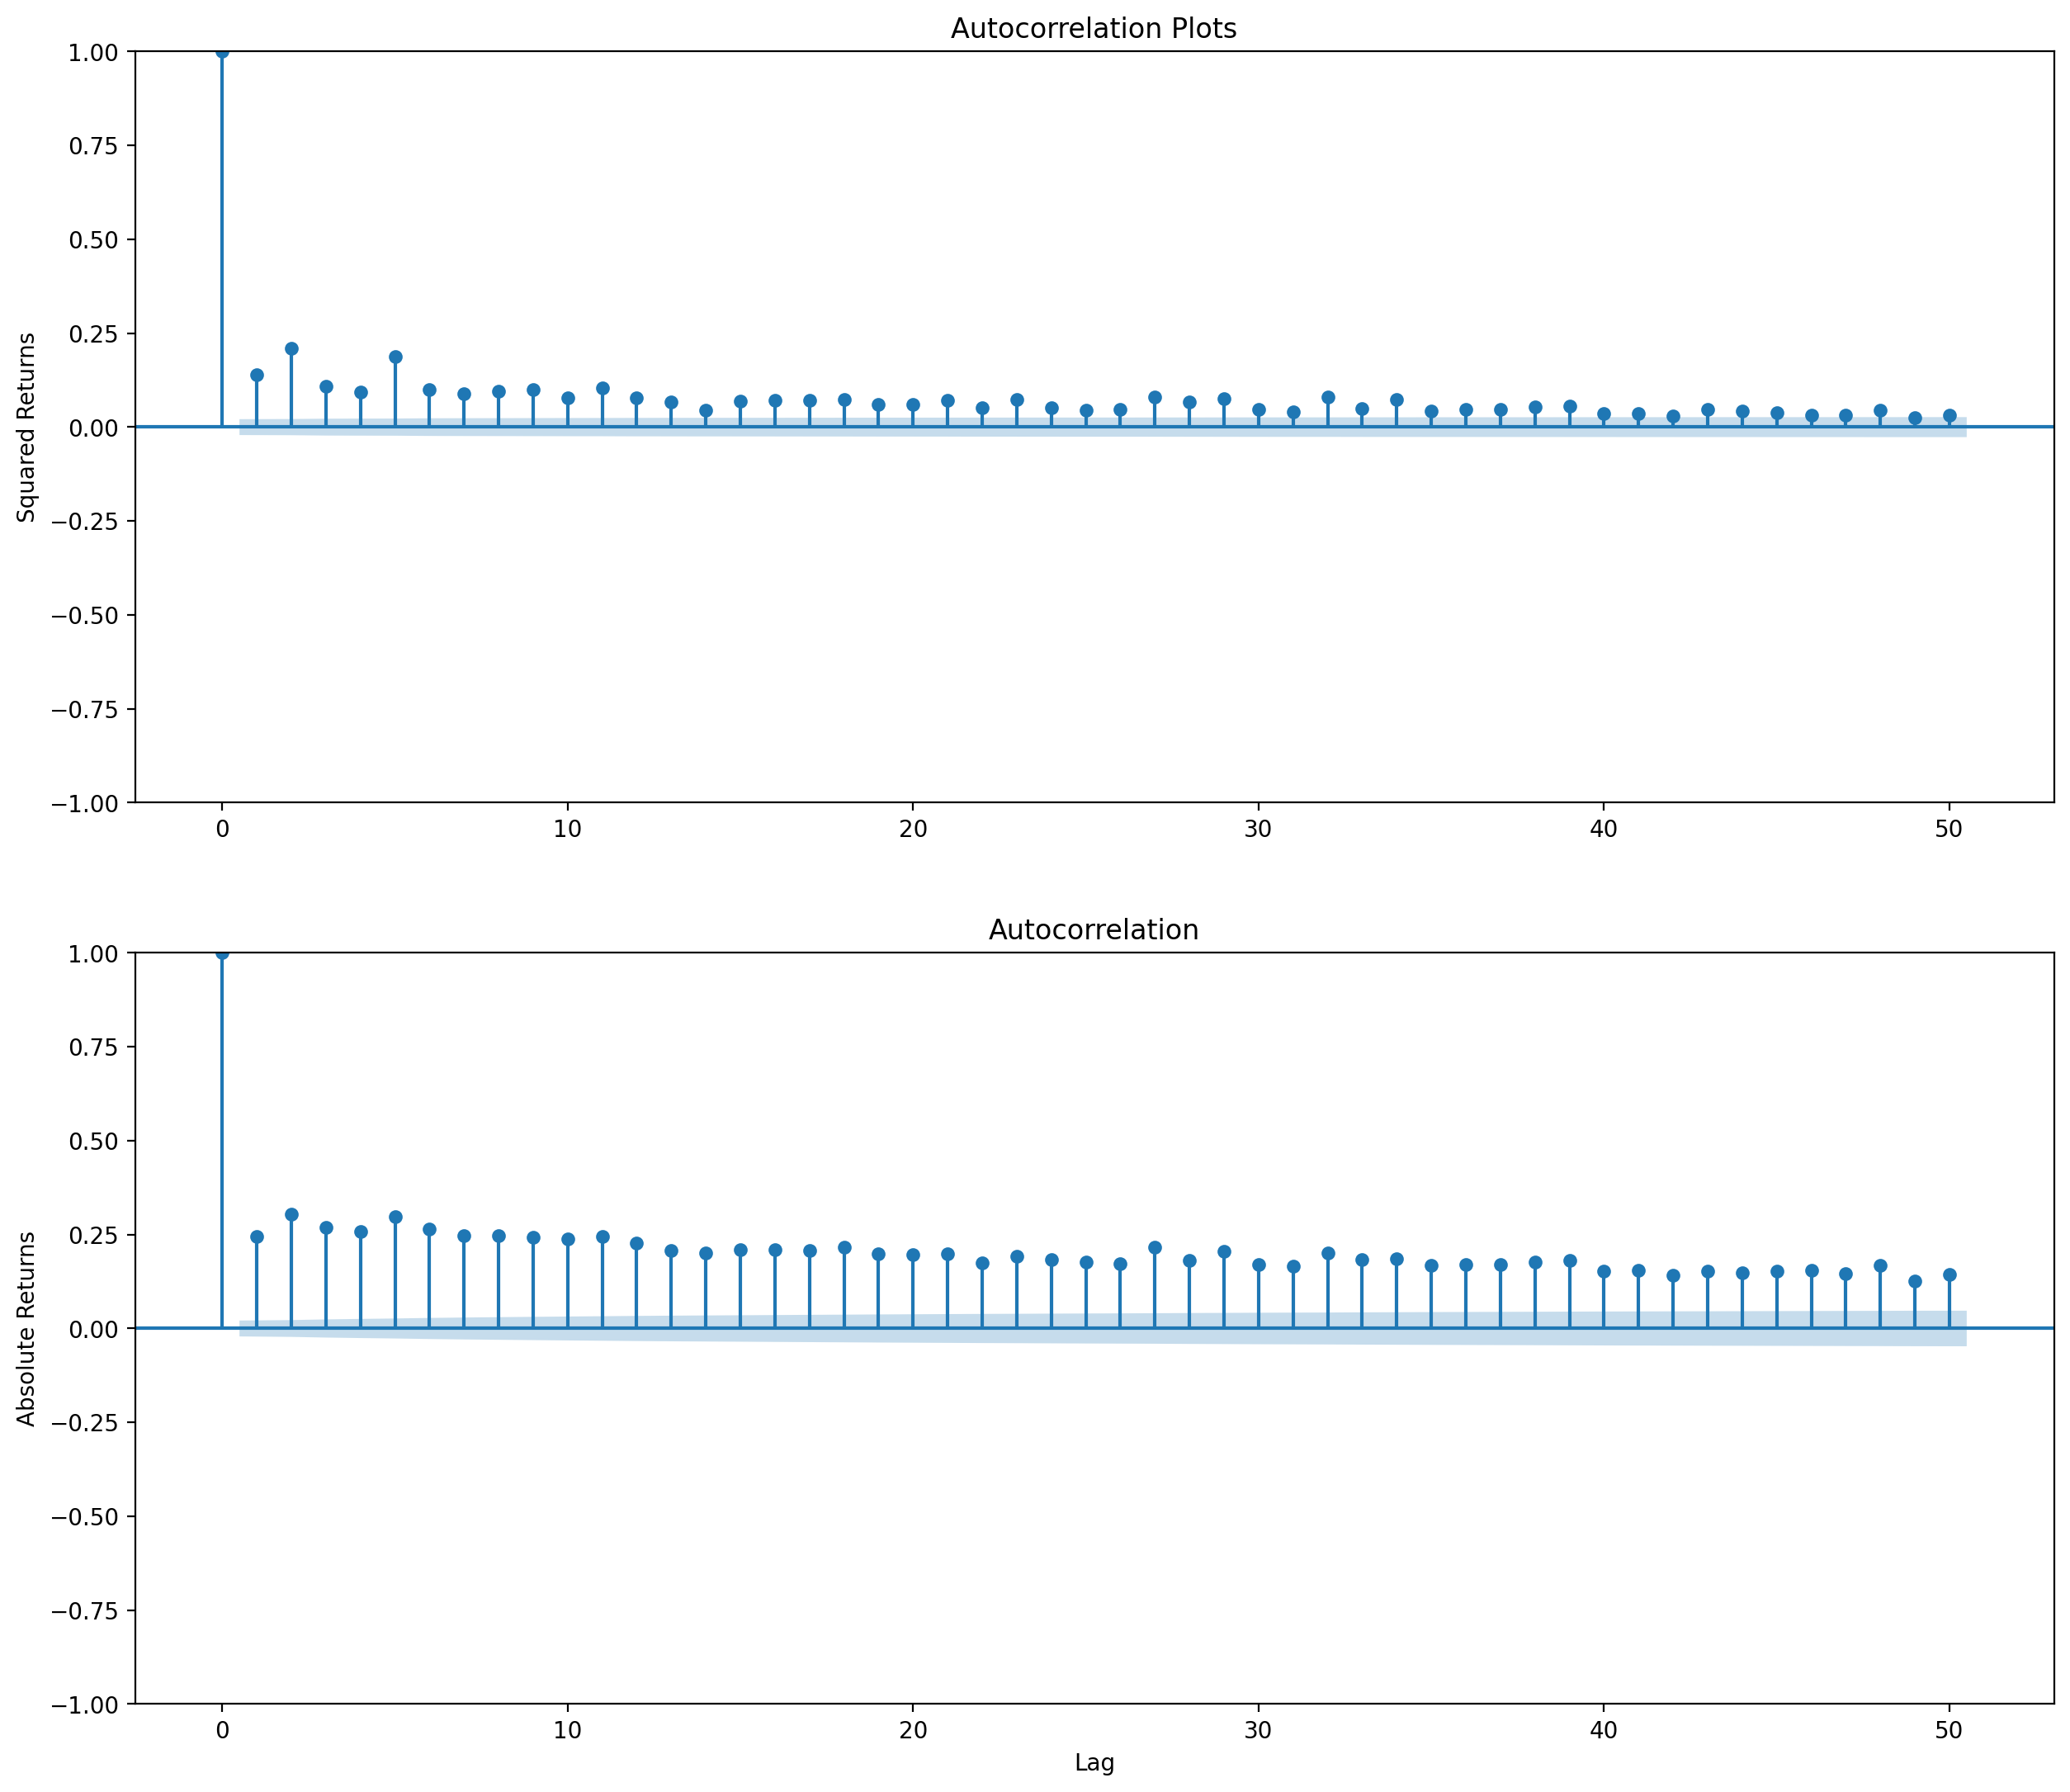

In [40]:
# Small and decreasing autocorrelation in squared/absolute returns

fig, ax = plt.subplots(2, 1, figsize=(15, 13))

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, 
                     alpha=SIGNIFICANCE_LEVEL, ax = ax[0])
ax[0].set(title='Autocorrelation Plots',
         ylabel='Squared Returns')

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, 
                     alpha=SIGNIFICANCE_LEVEL, ax = ax[1])
ax[1].set(ylabel='Absolute Returns',
         xlabel='Lag')

# plt.tight_layout()
plt.show()

In [42]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()